# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [50]:
# откройте данные: ваш код здесь
import numpy as np
import pandas as pd
email_data = pd.read_csv('C:\IDE\Math analyze\Наивный Байес\spam_or_not_spam\spam_or_not_spam.csv')
email_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [51]:
# рассчитайте частоты для классов : ваш код здесь
email_data.groupby('label').count()

,email
label,
0,2500
1,499


In [ ]:
# визуализируйте результат: ваш код здесь

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [52]:
#ваш код здесь
email_data_clean = email_data.dropna(subset=['email']).copy()
email_data_clean = email_data_clean[email_data_clean['email'].str.strip().astype(bool)]

print(email_data_clean)



                                                  email  label
0      date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1     martin a posted tassos papadopoulos the greek ...      0
2     man threatens explosion in moscow thursday aug...      0
3     klez the virus that won t die already the most...      0
4      in adding cream to spaghetti carbonara which ...      0
...                                                 ...    ...
2995   abc s good morning america ranks it the NUMBE...      1
2996   hyperlink hyperlink hyperlink let mortgage le...      1
2997   thank you for shopping with us gifts for all ...      1
2998   the famous ebay marketing e course learn to s...      1
2999   hello this is chinese traditional 子 件 NUMBER世...      1

[2997 rows x 2 columns]


Переводим данные в векторный вид:

Определите, сколько теперь признаков в нашем наборе данных:

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [53]:
#ваш код здесь
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email_data_clean['email'])
y = email_data_clean['label']
email_data_clean['label'].value_counts() 
email_data.head()


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [54]:
#ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=0.75, 
    test_size=0.25, 
    stratify=y, 
    random_state=42
)


Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [56]:
#ваш код здесь
mean_target_test = y_test.mean()
print(mean_target_test)

0.16533333333333333


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [59]:
#ваш код здесь
from sklearn.naive_bayes import ComplementNB
model = ComplementNB(alpha=0.01)
model.fit(X_train, y_train)

,alpha,0.01
,force_alpha,True
,fit_prior,True
,class_prior,None
,norm,False


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [63]:
#ваш код здесь
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       626
           1       1.00      0.93      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750



Нарисуйте ROC-кривую:

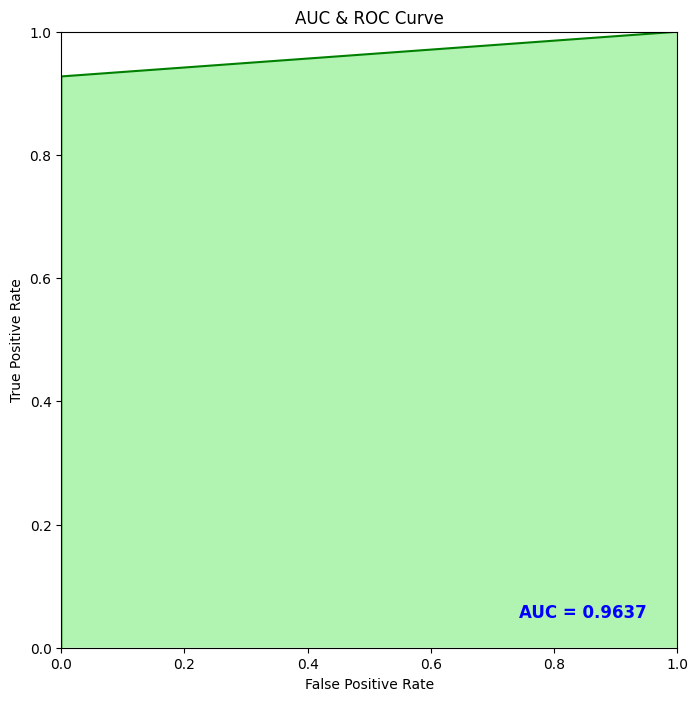

In [65]:
#ваш код здесь
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь